In [28]:
from datasets import load_dataset
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data_files = {"train": "../data/train.json", "test": "../data/valid.json"}
qa_dataset = load_dataset("json", data_files=data_files)

with open("../data/context.json") as f:
    context_data = json.load(f)

def preprocess(example):
    data = dict()
    data['context'] = context_data[example['relevant']]
    data['answers'] = {"answer_start": [example['answer']['start']],
                       "text": [example['answer']['text']]}
    
    return data

Using custom data configuration default-bf2c0e59b3d5d02d
Found cached dataset json (/home/whlin/.cache/huggingface/datasets/json/default-bf2c0e59b3d5d02d/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 2/2 [00:00<00:00, 1184.00it/s]


In [30]:
squad_format_dataset = qa_dataset.map(preprocess, remove_columns=['answer', 'paragraphs', 'relevant'])

Loading cached processed dataset at /home/whlin/.cache/huggingface/datasets/json/default-bf2c0e59b3d5d02d/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-57fb00011e0b4267.arrow
Loading cached processed dataset at /home/whlin/.cache/huggingface/datasets/json/default-bf2c0e59b3d5d02d/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-657c724419f1abe8.arrow


In [31]:
squad_format_dataset.set_format('pandas')

val_df = squad_format_dataset['test'][:]
train_df = squad_format_dataset['train'][:]

dfs = {'train': train_df, "test": val_df}

In [32]:
for df in dfs.keys():
    print(dfs[df].head())

                                 id  \
0  593f14f960d971e294af884f0194b3a7   
1  acd5d763ec4c250f9a11eac1412d6814   
2  5670000714a658c5e52658e22e6985f7   
3  f71493751ccfce42aae7a99ed3f20dbb   
4  56d547357d11a8938197072d82aa126c   

                                    question  \
0                       舍本和誰的數據能推算出連星的恆星的質量？   
1                               在關西鎮以什麼方言為主？   
2  「有錫兵，天下爭。無錫寧，天下清。」指的是何人攻破蘭陵後，率軍駐無錫錫山時的上書?   
3                                《方法論》的作者是誰?   
4                             環繞速度又為哪種速度的別稱?   

                                             context  \
0  在19世紀雙星觀測所獲得的成就使重要性也增加了。在1834年，白塞爾觀測到天狼星自行的變化，...   
1  新竹縣是中華民國臺灣省的縣，位於臺灣本島西北部，北臨桃園市，南接苗栗縣，東南以雪山山脈與宜蘭...   
2  「無錫」一名的由來所說頗多，傳播最廣的觀點源自馮夢龍的《東周列國志》：戰國末年，秦王嬴政大將...   
3  在歐洲，基礎性的論證來自博納文圖拉•卡瓦列里，他提出體積和面積應該用求無窮小橫截面/段的體積...   
4  宇宙速度是物體從地球出發，在天體的重力場中運動，四個較有代表性的初始速度的統稱。太空載具按其...   

                                       answers  
0    {'answer_start': [108], 'text': ['斯特魯維']}  
1  {'answer_start': [306], 'text': ['四縣腔客

In [33]:
for df in dfs.keys():
    print(dfs[df].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21714 entries, 0 to 21713
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        21714 non-null  object
 1   question  21714 non-null  object
 2   context   21714 non-null  object
 3   answers   21714 non-null  object
dtypes: object(4)
memory usage: 678.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3009 non-null   object
 1   question  3009 non-null   object
 2   context   3009 non-null   object
 3   answers   3009 non-null   object
dtypes: object(4)
memory usage: 94.2+ KB
None


# 觀察context length和answer length

In [34]:
for df in dfs.values():
    df['context_length'] = df.apply(lambda x: len(x['context']), axis=1)
    df['answer_length'] = df.apply(lambda x: len(x['answers']['text'][0]), axis = 1)
    df['question_length'] = df.apply(lambda x: len(x['question']), axis = 1)

In [35]:
# train_df.drop(columns = ["context_legnth"])

In [36]:
for df in dfs.values():
    print(df['context_length'].mean())
    print(df['question_length'].mean())
    print(df['answer_length'].mean())
    print(df['answer_length'].quantile(.995)) # 99%的人小於這個長度

440.1639495256517
20.85290595928894
4.752970433821497
24.0
449.97540711199736
21.74576271186441
5.213027583914922
30.0


/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<Figure size 500x500 with 0 Axes>

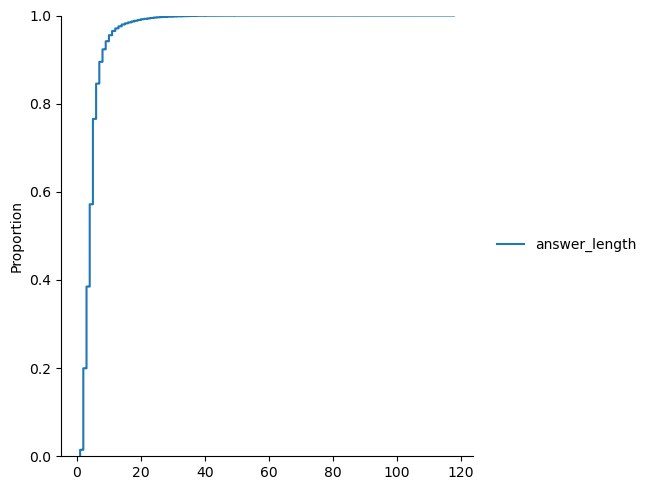

<Figure size 500x500 with 0 Axes>

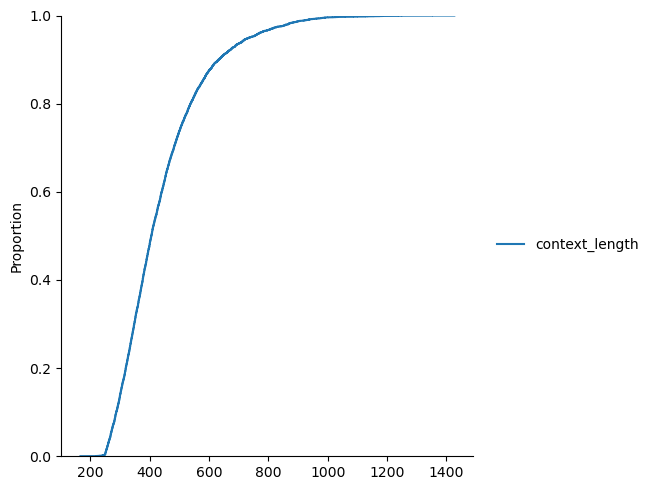

<Figure size 500x500 with 0 Axes>

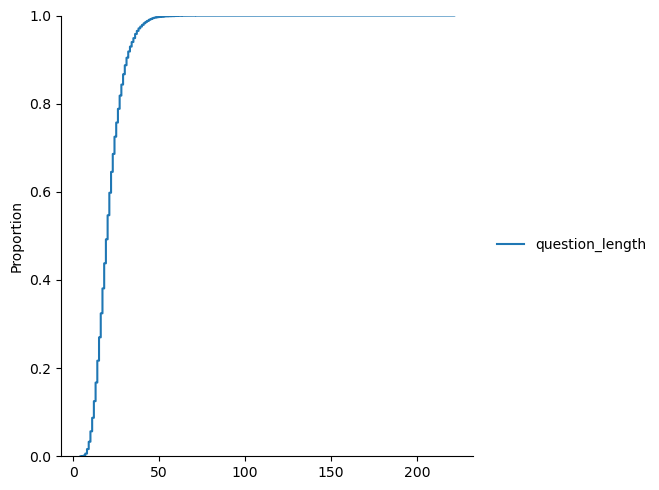

<Figure size 500x500 with 0 Axes>

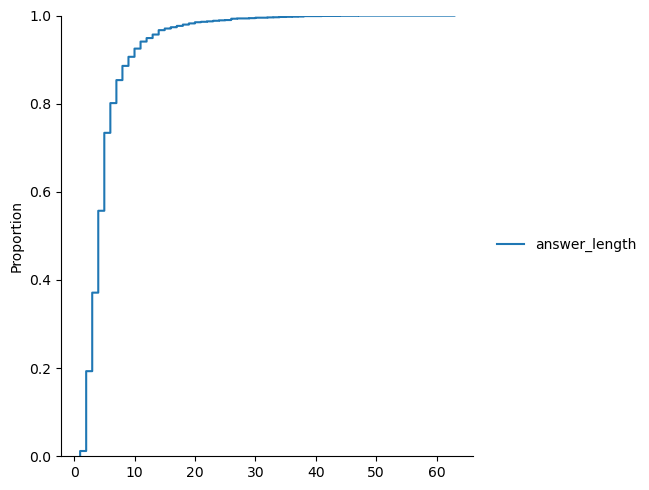

<Figure size 500x500 with 0 Axes>

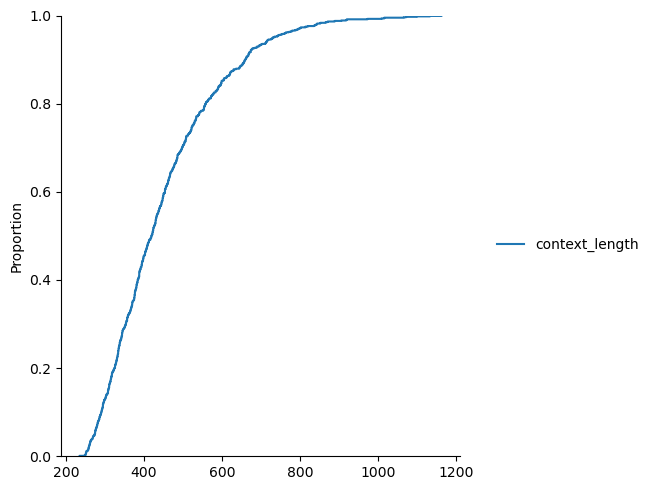

<Figure size 500x500 with 0 Axes>

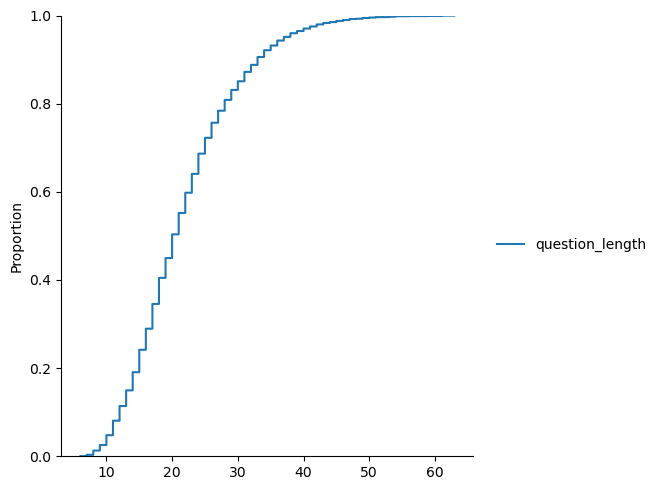

In [37]:
for df in dfs.values():
    for column in ['answer_length', 'context_length', 'question_length']:
        plt.figure(figsize = (5, 5))
        sns.displot(df.loc[:, [column]], kind='ecdf')

# Observe Predict Result

In [38]:
import pandas as pd

In [39]:
predict_df = pd.read_csv("../data/valid_predict.csv")

In [40]:
dfs['test'].head()

,id,question,context,answers,context_length,answer_length,question_length
0,9f0860355c55e113d615cc88b3fa9420,伊利諾大學是哪一個國家的大學?,伊利諾大學創建於1867年，是美國伊利諾州的一個大學系統，包括厄巴納-香檳、芝加哥、春田三個...,"{'answer_start': [15], 'text': ['美國']}",338,2,15
1,20f49d82038169b184336c4c1f96f64d,中華人民共和國成立後，土地改革運動由誰所主持帶領?,劉少奇，譜名紹選，表字渭璜，湖南省寧鄉縣人，祖籍江西吉水，是中國現代史上的重要政治家、中國共...,"{'answer_start': [433], 'text': ['劉少奇']}",700,3,25
2,44fbf143b338305c5c553fc733b1fe54,哈康七世海、拉扎耶夫海、戴維斯海、莫森海均有一部份位於哪一洋的範圍內？,南冰洋包括南冰洋洋流、德雷克海峽的一部分、斯科舍海、威德爾海、哈康七世海、拉扎耶夫海、里瑟-...,"{'answer_start': [0], 'text': ['南冰洋']}",286,3,35
3,9cacc447cfc4b2dbcf3509ad9b07210f,天主教廷的什麼推廣活動與當時貴族階層的作戰和冒險欲望強烈相衝突？,歐洲在1000年左右開始，城市居民增加，開始有別於鄉村，不過這些城市規模遠小於東方。在東方許...,"{'answer_start': [285], 'text': ['上帝和平、上帝休戰']}",301,9,32
4,2d3afb7bd17af9bb2e1b8ce890ee55d0,成吉思汗的哪一個兒子成為大汗繼承人?,於1223年的迦勒迦河之戰更是擊潰基輔羅斯諸國與欽察忽炭汗的聯軍，並向西進軍到今烏克蘭西部的...,"{'answer_start': [152], 'text': ['窩闊台']}",554,3,18


In [43]:
df['label'] = df.apply(lambda x: x['answers']['text'][0], axis=1)

In [44]:
result = predict_df.merge(dfs['test'], how = 'inner', on = 'id')

In [45]:
print(predict_df)

                                    id       answer
0     9f0860355c55e113d615cc88b3fa9420           美國
1     20f49d82038169b184336c4c1f96f64d          劉少奇
2     44fbf143b338305c5c553fc733b1fe54          南冰洋
3     9cacc447cfc4b2dbcf3509ad9b07210f    上帝和平、上帝休戰
4     2d3afb7bd17af9bb2e1b8ce890ee55d0        三子窩闊台
...                                ...          ...
3004  9f1432a829a6ca3bc939dec0b83ce5aa     富蘭克林國民銀行
3005  3b3b96583d25c805f7ac0e5385d48365  在細胞中積累並造成危害
3006  c728c79fb0de893fb92f81d179aff661         第十二屆
3007  5d404a02f3d61566f3bd8e76965f9ce3      約翰昆西亞當斯
3008  0d0e80cbf20aece5604c2cb7a875e6b8            磷

[3009 rows x 2 columns]


In [47]:
wrong_case = result.loc[result['answer'] != result['label']] 

In [55]:
brief_wrong_case = wrong_case.drop(['context_length', 'answer_length', "question_length", "answers", 'context'], axis = 1)

In [54]:
brief_wrong_case.to_csv("../data/wrong_answer.csv", index=False)

In [57]:
brief_wrong_case.head(100)

,id,answer,question,label
4,2d3afb7bd17af9bb2e1b8ce890ee55d0,三子窩闊台,成吉思汗的哪一個兒子成為大汗繼承人?,窩闊台
6,a62dfeb4578129a61efb718b595d4635,每一位消費者的邊際成本趨近於零，我們稱這種公財,「純公共財」指的是什麼?,每一位消費者的邊際成本趨近於零
9,42ecc7addfc58b308f4fde61b2ff4b7d,提姆·柏內茲-李,全球資訊網是誰發明的?,英國科學家提姆·柏內茲-李
11,20cce8869867ffd56dad5c039841ccfa,三個,南非有幾個首都?,三
15,e487de43f85bb78e0c76629cd6b20dc2,唐朝善導大師,蓮宗是誰創立的?,善導大師
...,...,...,...,...
618,a28334b2703ce4fe3c2ed383f8f5b9e0,非鐵金屬冶金學,冶金學可以分為鋼鐵冶金學及什麼冶金法?,非鐵金屬
619,bf5538931bcc2d4b1b779a48dee7c892,在公元前288年,在阿努拉德普勒古寺內的聖菩提樹有甚麼來歷?,這棵菩提樹是在公元前288年用當年釋迦牟尼佛坐在其下得道的菩提樹的扦插苗移栽而存活至今的
620,aec967b7ffb6cfcfdea51d55a293438c,收集、保存韓國電影,韓國實施電影義務納本制度達到了什麼效果？,1997年以後製作的韓國電影全部保存
627,fde746bd77ae6684de46b9a03607bccb,途徑中的反應對於特定的代謝問題已經是一個優化的解決辦法,為何古老的代謝途徑沒有進一步進化？,可能是途徑中的反應對於特定的代謝問題已經是一個優化的解決辦法，可以以很少的步驟達而到很高的效率


In [58]:
len("可能是途徑中的反應對於特定的代謝問題已經是一個優化的解決辦法，可以以很少的步驟達而到很高的效率")

47